In [1]:
import numpy as np

# Generate the innovations of the time series (an MxT)
M, T = 5, 250
procs = np.random.normal(size=(M,T))

# Introduce first-order AR dependence on the innovations
def make_ar(x):
    for i in range(1,len(x)):
        x[i] += 0.5 * x[i-1]

make_ar(procs[0])
for i in range(1,M):
    procs[i][1:] += 0.25 * procs[i-1][:-1] # Add a time-lagged dependence onto the observations
    make_ar(procs[i])

[Text(0.5, 69.0, 'Process'), Text(678.1249999999999, 0.5, 'Time')]

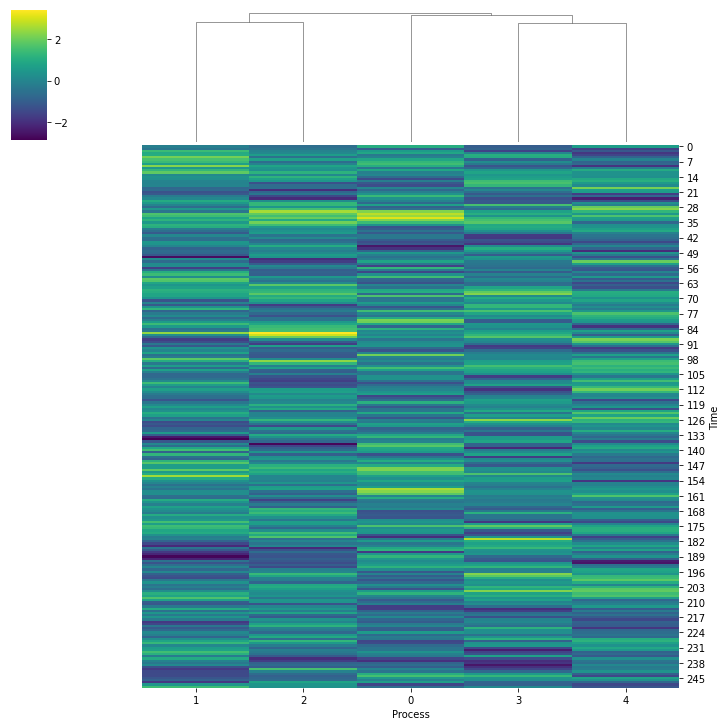

In [2]:
# Load the Data class
from pynats.data import Data
import seaborn as sns

#   - dim_order specifies processes is the first dimension and samples/observations are the second
#   - normalise z-scores the data
data = Data(procs, dim_order='ps', normalise=True)

dat = data.to_numpy(squeeze=True)

g = sns.clustermap(np.transpose(dat),
                    cmap='viridis', figsize=(10,10),
                    col_cluster=True, row_cluster=False)
ax_im = g.ax_heatmap

ax_im.set(xlabel='Process', ylabel='Time')

In [3]:
# Load the Calculator class
from pynats.calculator import Calculator

# Let's create an unnamed calculator
calc = Calculator(dataset=data,name='demo')

initialised with identifier "igci"
[28] Adding measure .causal.reci(x,y)...
Succesfully initialised with identifier "reci"
*** Importing module .temporal
[29] Adding measure .temporal.coint(x,y,{'method': 'johansen', 'statistic': 'max_eig_stat'})...
Succesfully initialised with identifier "coint_johansen_max_eig_stat"
[30] Adding measure .temporal.coint(x,y,{'method': 'johansen', 'statistic': 'trace_stat'})...
Succesfully initialised with identifier "coint_johansen_trace_stat"
[31] Adding measure .temporal.coint(x,y,{'method': 'aeg', 'statistic': 'tstat'})...
Succesfully initialised with identifier "coint_aeg_tstat"
[32] Adding measure .temporal.coint(x,y,{'method': 'aeg', 'statistic': 'pvalue'})...
Succesfully initialised with identifier "coint_aeg_pvalue"
[33] Adding measure .temporal.ccm(x,y,{'statistic': 'mean'})...
Succesfully initialised with identifier "ccm_mean"
[34] Adding measure .temporal.ccm(x,y,{'statistic': 'max'})...
Succesfully initialised with identifier "ccm_max"
[35]

In [4]:
calc.compute()

Processing [demo: ce_kozachenko]:  65%|██████▌   | 101/155 [00:29<00:04, 12.20it/s]Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Spectral GC failed: array must not contain infs or NaNs
Processing [demo: te_gaussian_k-1_kt-1_l-1_lt-1]: 100%|██████████| 155/155 [00:51<00:00,  2.98it/s]


In [5]:
# Should be an adjacency matrix of features x processes x processes
print(calc.adjacency.shape)

# Prune off any measures/processes that are mostly non-finite
calc.prune()

# Might have changed
print(calc.adjacency.shape)

(155, 5, 5)
Pruning:
	- Measures with more than 20.0% bad values, and
	- Processes with more than 80.0% bad values
Measure "[88] gd_fs-1_fmin-0_fmax-0-5" has non-finite sum. Removing.
Measure "[89] gd_fs-1_fmin-0_fmax-0-25" has non-finite sum. Removing.
Measure "[90] gd_fs-1_fmin-0-25_fmax-0-5" has non-finite sum. Removing.
Measure "[91] sgc_fs-1_fmin-0_fmax-0-5_order-None" has non-finite sum. Removing.
Measure "[92] sgc_fs-1_fmin-0_fmax-0-25_order-None" has non-finite sum. Removing.
Measure "[93] sgc_fs-1_fmin-0-25_fmax-0-5_order-None" has non-finite sum. Removing.
Measure "[94] sgc_fs-1_fmin-0_fmax-0-5_order-1" has non-finite sum. Removing.
Measure "[95] sgc_fs-1_fmin-0_fmax-0-25_order-1" has non-finite sum. Removing.
Measure "[96] sgc_fs-1_fmin-0-25_fmax-0-5_order-1" has non-finite sum. Removing.
Measure "[97] sgc_fs-1_fmin-0_fmax-0-5_order-20" has non-finite sum. Removing.
Measure "[98] sgc_fs-1_fmin-0_fmax-0-25_order-20" has non-finite sum. Removing.
Measure "[99] sgc_fs-1_fmin-0-

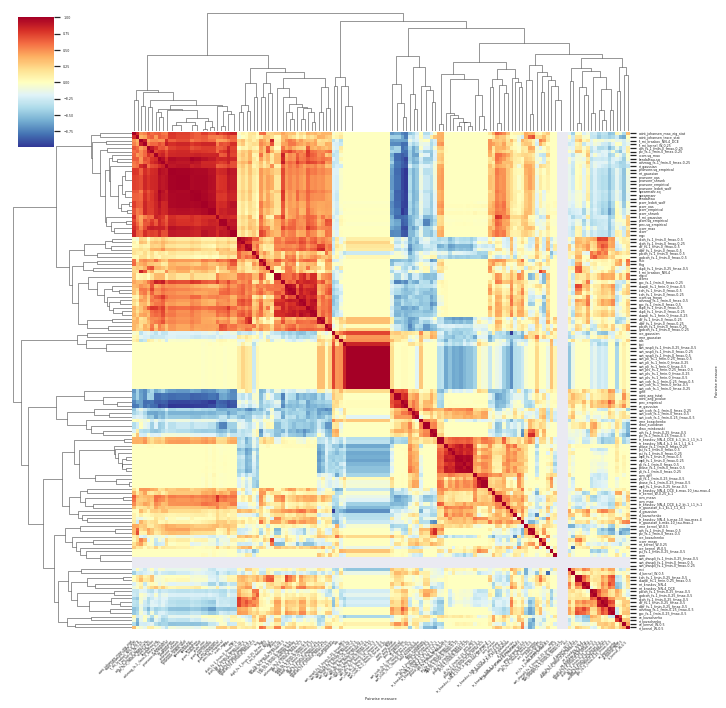

In [6]:
import matplotlib.pyplot as plt

# Correlate all the features
corrmat = calc.flatten().corr(method='spearman')

sns.set(font_scale=0.3)
g = sns.clustermap(corrmat.fillna(0), mask=corrmat.isna(),
                    center=0.0,
                    cmap='RdYlBu_r',
                    xticklabels=1, yticklabels=1 )

plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.show()

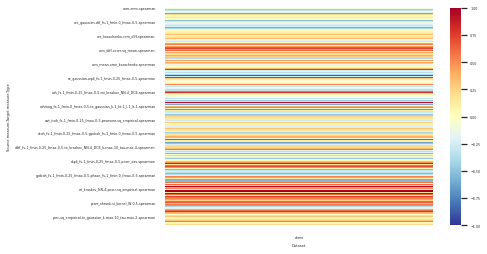

In [7]:
from pynats.calculator import CorrelationFrame

cf = CorrelationFrame(calc)

fm = cf.get_feature_matrix()

sns.heatmap(fm,cmap='RdYlBu_r',yticklabels=calc.n_measures)

plt.show()